In [104]:
import pandas as pd                                                  # to import csv and for data manipulation
import matplotlib.pyplot as plt                                      # to plot graph
import seaborn as sns                                                # for intractve graphs
import numpy as np                                                   
from scipy.stats import hmean
                                               
%matplotlib inline
from sklearn.preprocessing import StandardScaler                     # for preprocessing the data

from sklearn.metrics import confusion_matrix,recall_score,precision_recall_curve,auc,roc_curve,roc_auc_score,classification_report

from sklearn.model_selection import train_test_split, StratifiedKFold, KFold,cross_val_score, GridSearchCV, RepeatedStratifiedKFold

from catboost import CatBoostClassifier, Pool

from sklearn import metrics, preprocessing, model_selection
import warnings
warnings.filterwarnings('ignore')

In [48]:
df_train = pd.read_csv('Train.csv')
df_test = pd.read_csv('Test.csv')

In [49]:
df_test.shape

(527, 53)

In [50]:
sub_df = pd.read_excel('Sample_Submission.xlsx')

In [51]:
sub_df.columns

Index(['IsGoodNews'], dtype='object')

In [52]:
df_train.head()

,Freq_Of_Word_1,Freq_Of_Word_2,Freq_Of_Word_3,Freq_Of_Word_4,Freq_Of_Word_5,Freq_Of_Word_6,Freq_Of_Word_7,Freq_Of_Word_8,Freq_Of_Word_9,Freq_Of_Word_10,...,Freq_Of_Word_45,Freq_Of_Word_46,Freq_Of_Word_47,Freq_Of_Word_48,Freq_Of_Word_49,Freq_Of_Word_50,TotalEmojiCharacters,LengthOFFirstParagraph,StylizedLetters,IsGoodNews
0,-0.351864,2.620660,1.253645,-0.039223,-0.465210,-0.353977,-0.304257,-0.240708,-0.318797,-0.352968,...,-0.323019,-0.205212,-0.079531,-0.118688,0.079303,0.157385,-0.028751,-0.046474,0.222453,1
1,-0.351864,-0.318036,-0.561952,-0.039223,-0.465210,-0.353977,-0.304257,3.837751,-0.318797,-0.352968,...,-0.323019,-0.205212,-0.079531,-0.118688,-0.151911,-0.453742,-0.107383,-0.195476,-0.408024,0
2,-0.351864,-0.318036,-0.561952,-0.039223,-0.465210,-0.353977,-0.304257,-0.240708,-0.318797,-0.352968,...,-0.323019,-0.205212,-0.079531,-0.118688,-0.151911,-0.453742,-0.107383,-0.187634,-0.392578,0
3,1.210190,2.682528,1.291868,-0.039223,0.221744,-0.353977,-0.304257,0.859101,-0.318797,2.374782,...,-0.323019,-0.205212,-0.079531,-0.118688,-0.151911,0.340723,1.334201,2.270899,0.602985,1
4,-0.351864,-0.318036,-0.561952,-0.039223,-0.465210,-0.353977,-0.304257,-0.240708,-0.318797,-0.352968,...,-0.323019,-0.205212,-0.079531,-0.118688,-0.151911,0.930461,-0.028751,-0.113133,-0.128592,0


In [53]:
#sns.pairplot(df_train, diag_kind='kde')

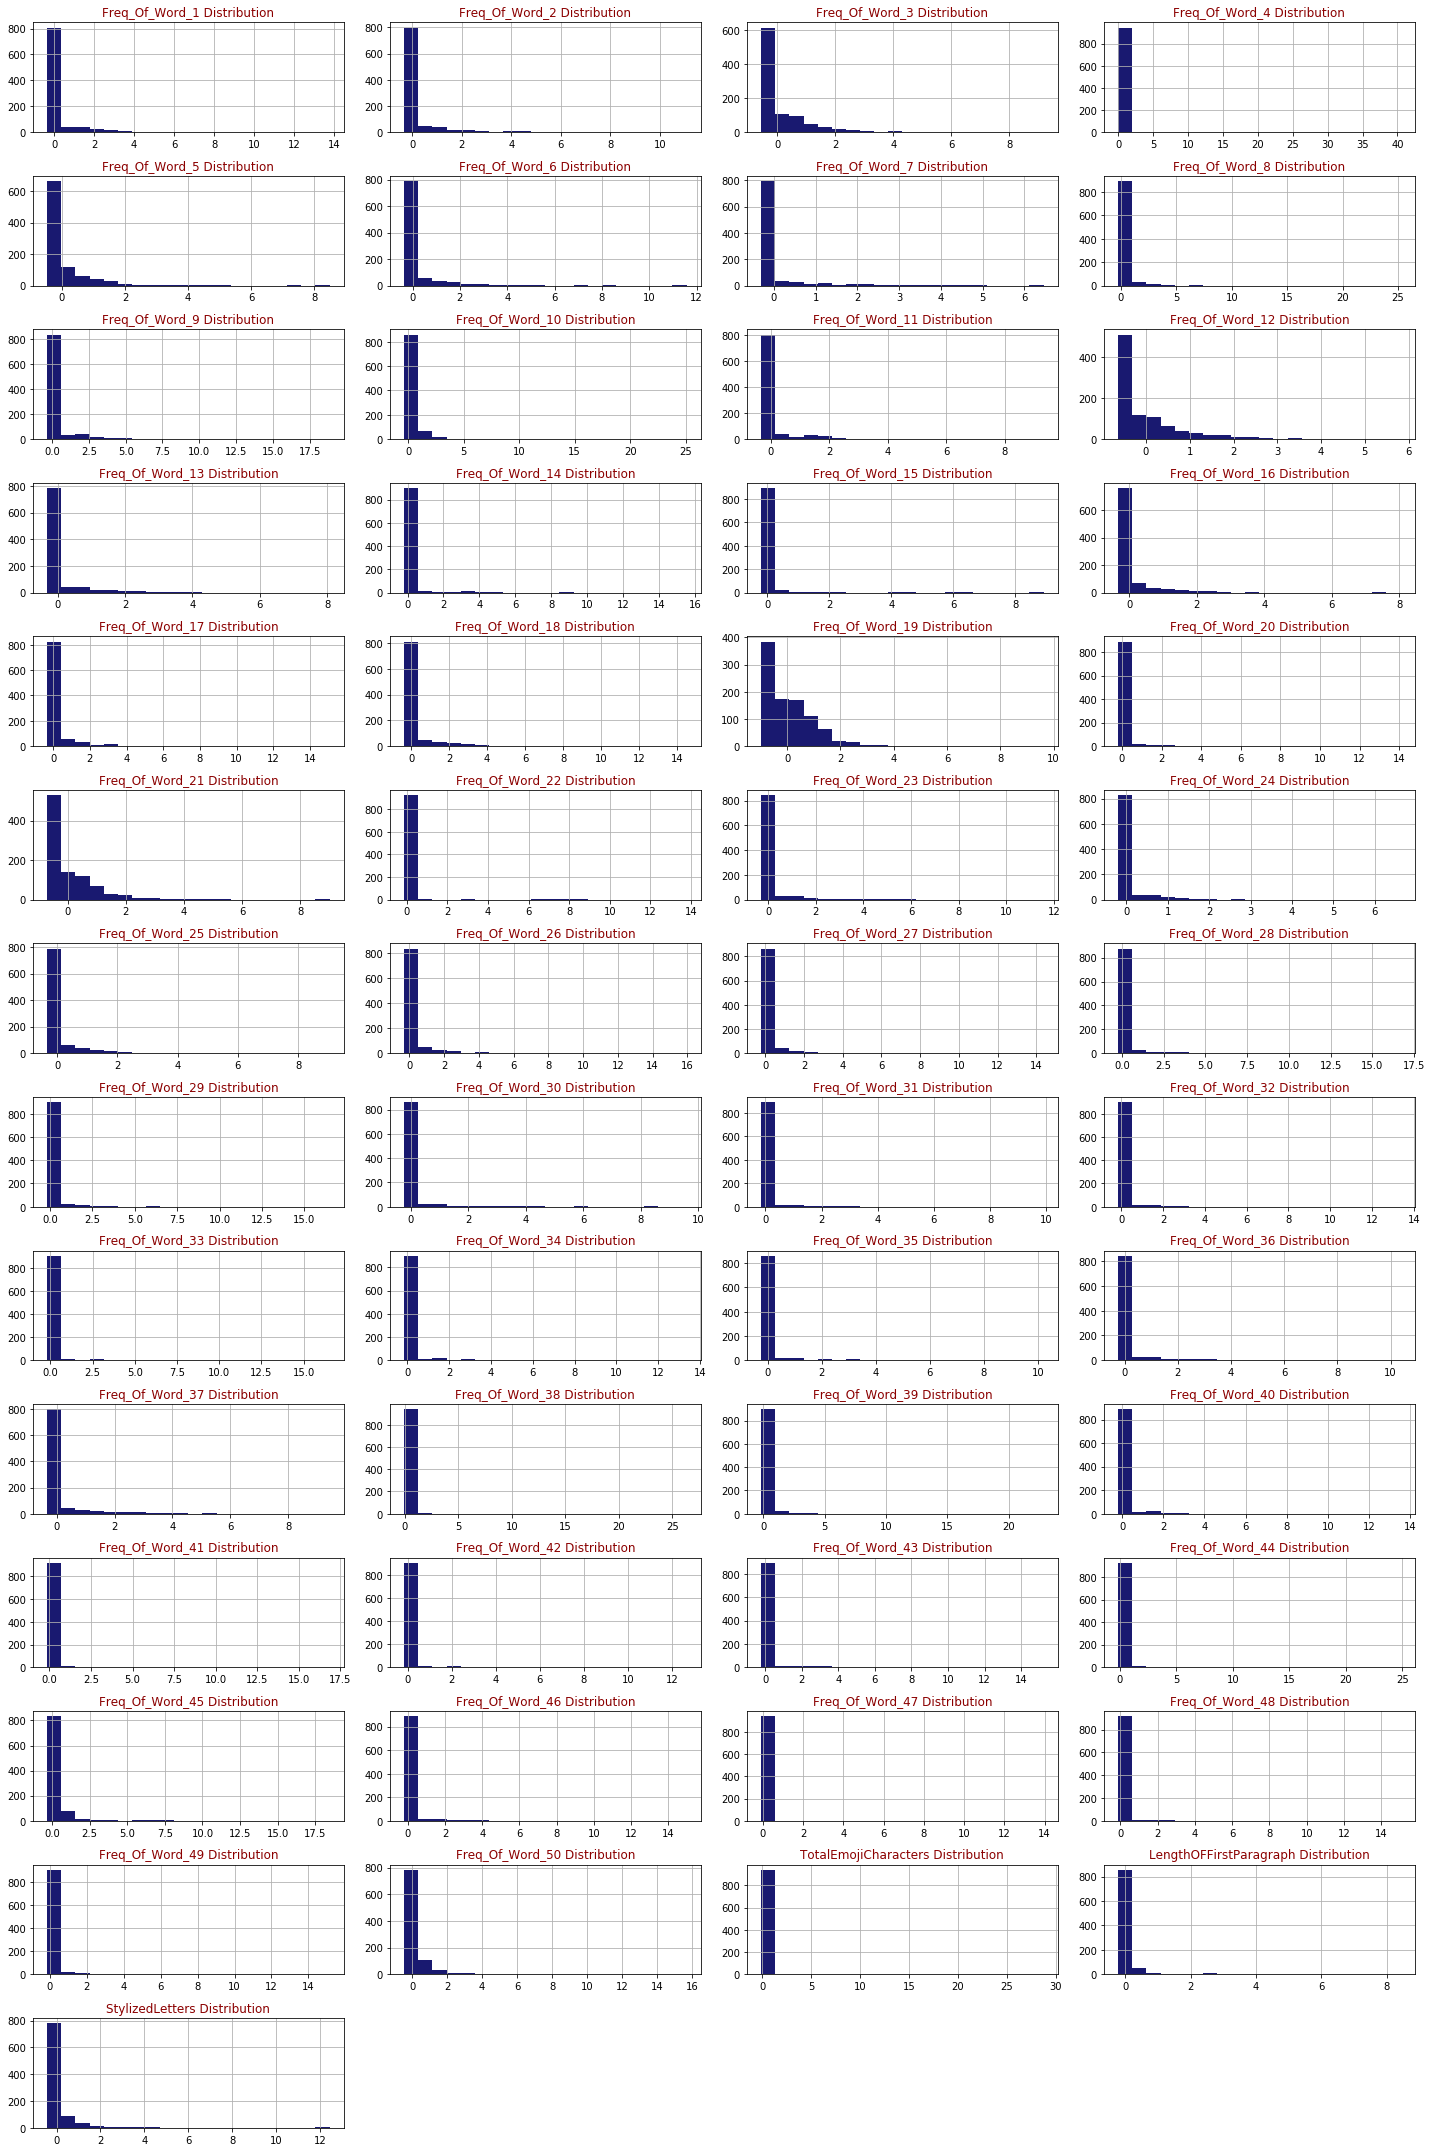

In [21]:
#to check the distribution of each feature
def draw_histograms(dataframe, features, rows, cols):
    fig=plt.figure(figsize=(20,30))
    for i, feature in enumerate(features):
        ax=fig.add_subplot(rows,cols,i+1)
        dataframe[feature].hist(bins=20,ax=ax,facecolor='midnightblue')
        ax.set_title(feature+" Distribution",color='DarkRed')
        
    fig.tight_layout()  
    plt.show()
draw_histograms(df_train,df_train.columns[:-1],14,4)

In [54]:
df_train.shape

(947, 54)

In [55]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 947 entries, 0 to 946
Data columns (total 54 columns):
Freq_Of_Word_1            947 non-null float64
Freq_Of_Word_2            947 non-null float64
Freq_Of_Word_3            947 non-null float64
Freq_Of_Word_4            947 non-null float64
Freq_Of_Word_5            947 non-null float64
Freq_Of_Word_6            947 non-null float64
Freq_Of_Word_7            947 non-null float64
Freq_Of_Word_8            947 non-null float64
Freq_Of_Word_9            947 non-null float64
Freq_Of_Word_10           947 non-null float64
Freq_Of_Word_11           947 non-null float64
Freq_Of_Word_12           947 non-null float64
Freq_Of_Word_13           947 non-null float64
Freq_Of_Word_14           947 non-null float64
Freq_Of_Word_15           947 non-null float64
Freq_Of_Word_16           947 non-null float64
Freq_Of_Word_17           947 non-null float64
Freq_Of_Word_18           947 non-null float64
Freq_Of_Word_19           947 non-null float64
Fr

In [57]:
#checking for null values
df_train.isnull().sum().sum()

0

In [58]:
df_train.describe()

,Freq_Of_Word_1,Freq_Of_Word_2,Freq_Of_Word_3,Freq_Of_Word_4,Freq_Of_Word_5,Freq_Of_Word_6,Freq_Of_Word_7,Freq_Of_Word_8,Freq_Of_Word_9,Freq_Of_Word_10,...,Freq_Of_Word_45,Freq_Of_Word_46,Freq_Of_Word_47,Freq_Of_Word_48,Freq_Of_Word_49,Freq_Of_Word_50,TotalEmojiCharacters,LengthOFFirstParagraph,StylizedLetters,IsGoodNews
count,947.000000,947.000000,947.000000,947.000000,947.000000,947.000000,947.000000,947.000000,947.000000,947.000000,...,947.000000,947.000000,947.000000,947.000000,947.000000,947.000000,947.000000,947.000000,947.000000,947.000000
mean,0.023323,0.039056,0.020516,0.013038,-0.018424,0.002831,-0.006407,0.008428,0.044759,0.005193,...,0.059328,-0.005919,-0.031999,-0.001397,0.033669,0.013292,-0.013279,-0.021817,0.018881,0.388596
std,1.104679,1.085628,1.026794,1.345090,0.890268,0.970823,0.868676,1.136686,1.179691,1.129019,...,1.169027,0.959135,0.643179,0.821608,1.146482,0.860000,0.958807,0.513887,0.997459,0.487689
min,-0.351864,-0.318036,-0.561952,-0.039223,-0.465210,-0.353977,-0.304257,-0.240708,-0.318797,-0.352968,...,-0.323019,-0.205212,-0.079531,-0.118688,-0.151911,-0.453742,-0.107383,-0.219003,-0.427682,0.000000
25%,-0.351864,-0.318036,-0.561952,-0.039223,-0.465210,-0.353977,-0.304257,-0.240708,-0.318797,-0.352968,...,-0.323019,-0.205212,-0.079531,-0.118688,-0.151911,-0.453742,-0.107383,-0.195476,-0.374323,0.000000
50%,-0.351864,-0.318036,-0.561952,-0.039223,-0.465210,-0.353977,-0.304257,-0.240708,-0.318797,-0.352968,...,-0.323019,-0.205212,-0.079531,-0.118688,-0.151911,-0.230681,-0.081172,-0.164107,-0.277435,0.000000
75%,-0.351864,-0.318036,0.326735,-0.039223,0.107252,-0.353977,-0.304257,-0.240708,-0.318797,-0.080193,...,-0.018022,-0.205212,-0.079531,-0.118688,-0.151911,0.145162,-0.054961,-0.038632,-0.039427,1.000000
max,13.771711,11.065546,9.184940,40.442907,8.479498,11.570173,6.461416,25.215295,18.826505,25.078049,...,18.446001,14.997385,13.943676,15.030734,15.146785,15.670854,28.750489,8.419193,12.437402,1.000000


In [20]:
#checking correlation between the variables
corr_df = df_train.corr()
corr_df

,Freq_Of_Word_1,Freq_Of_Word_2,Freq_Of_Word_3,Freq_Of_Word_4,Freq_Of_Word_5,Freq_Of_Word_6,Freq_Of_Word_7,Freq_Of_Word_8,Freq_Of_Word_9,Freq_Of_Word_10,...,Freq_Of_Word_45,Freq_Of_Word_46,Freq_Of_Word_47,Freq_Of_Word_48,Freq_Of_Word_49,Freq_Of_Word_50,TotalEmojiCharacters,LengthOFFirstParagraph,StylizedLetters,IsGoodNews
Freq_Of_Word_1,1.000000,0.010394,-0.002367,-0.013153,0.020966,0.081520,0.047176,-0.008335,0.096471,0.048763,...,-0.036678,0.005400,-0.019728,-0.004575,-0.038761,-0.013797,0.008485,0.067895,0.053014,0.118213
Freq_Of_Word_2,0.010394,1.000000,0.080100,-0.012772,0.004583,-0.003339,0.172478,0.001162,0.043161,0.210548,...,-0.027928,-0.017376,-0.006659,-0.042215,0.015804,-0.058462,0.092289,0.148034,0.047688,0.170886
Freq_Of_Word_3,-0.002367,0.080100,1.000000,-0.021998,0.130316,0.077990,-0.011462,0.010934,0.062003,0.023857,...,-0.085817,-0.075904,-0.017425,-0.031101,-0.045449,0.000186,0.032936,0.091458,0.024856,0.167442
Freq_Of_Word_4,-0.013153,-0.012772,-0.021998,1.000000,-0.016472,-0.014258,0.032053,-0.004728,-0.005920,0.006542,...,-0.012720,-0.008082,-0.002874,-0.005553,0.001837,-0.020997,0.004771,0.046516,0.013794,0.048563
Freq_Of_Word_5,0.020966,0.004583,0.130316,-0.016472,1.000000,0.064095,0.100868,0.014420,0.018507,0.010941,...,-0.057029,-0.086024,-0.027709,-0.054150,-0.042927,-0.082370,0.003146,0.038279,-0.021524,0.231699
Freq_Of_Word_6,0.081520,-0.003339,0.077990,-0.014258,0.064095,1.000000,0.089194,0.064522,0.081660,0.008806,...,-0.082128,-0.059036,-0.024670,-0.045313,-0.016615,0.015599,-0.010733,0.126238,0.051525,0.259183
Freq_Of_Word_7,0.047176,0.172478,-0.011462,0.032053,0.100868,0.089194,1.000000,0.043794,0.106784,0.083965,...,-0.066613,-0.068576,-0.025366,-0.044060,-0.036877,-0.073792,0.056789,0.087923,-0.032189,0.394999
Freq_Of_Word_8,-0.008335,0.001162,0.010934,-0.004728,0.014420,0.064522,0.043794,1.000000,0.110751,0.040782,...,0.056538,-0.042613,-0.015039,-0.011828,-0.028695,-0.062708,0.018629,0.072371,0.034428,0.181393
Freq_Of_Word_9,0.096471,0.043161,0.062003,-0.005920,0.018507,0.081660,0.106784,0.110751,1.000000,0.107459,...,-0.078517,-0.052799,-0.002607,-0.042524,-0.028991,-0.055444,0.065809,0.248130,0.194155,0.226195
Freq_Of_Word_10,0.048763,0.210548,0.023857,0.006542,0.010941,0.008806,0.083965,0.040782,0.107459,1.000000,...,-0.044976,-0.043607,-0.020726,-0.019523,-0.007730,-0.023969,0.043950,0.142119,0.054715,0.092510


In [59]:
X = df_train.drop('IsGoodNews', axis=1)
Y = df_train['IsGoodNews']

In [60]:

x_train,x_valid,y_train,y_valid=train_test_split(X,Y,train_size =0.8, random_state = 40)

In [105]:
train_pool=Pool(X, Y)
test_pool=Pool(df_test) 

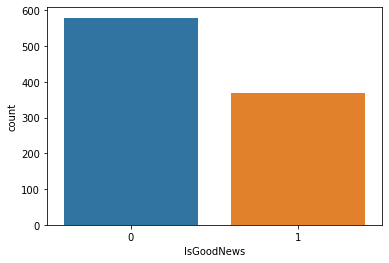

In [106]:
sns.countplot(Y)
plt.show()

In [62]:
Y.value_counts()

0    579
1    368
Name: IsGoodNews, dtype: int64

In [97]:
#since the label is imbalanced, assigning weights for the classes
weight=[0.428, 1]

In [98]:
model = CatBoostClassifier(
        iterations=5000,logging_level="Silent",early_stopping_rounds=1000,
    use_best_model=True,custom_loss=["F1"], class_weights=weight,bootstrap_type='Bayesian',
        eval_metric="F1")

In [99]:
model.fit(  x_train,y_train,
        eval_set=(x_valid,y_valid),
        plot=True 
        )

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [100]:
from sklearn.metrics import f1_score
f1_score(y_valid, model.predict(x_valid)) 

0.9565217391304348

In [103]:
print(model.get_feature_importance)

<bound method CatBoost.get_feature_importance of <catboost.core.CatBoostClassifier object at 0x000001BF31E98488>>


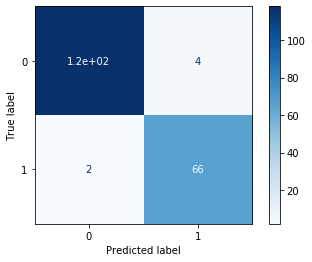

In [88]:
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.metrics import plot_confusion_matrix, confusion_matrix 
Cm=confusion_matrix(y_valid,model.predict(x_valid))
plot_confusion_matrix(model,x_valid, y_valid, cmap=plt.cm.Blues )

In [108]:
feature_importances=model.get_feature_importance(train_pool) 
feature_names=df_train.columns
for score, name in sorted(zip(feature_importances, feature_names), reverse=True):
    print('{}: {}'.format(name, score))

Freq_Of_Word_25: 10.692614563656425
Freq_Of_Word_7: 7.798005065673799
Freq_Of_Word_27: 7.767333002783566
LengthOFFirstParagraph: 7.048192644488278
Freq_Of_Word_21: 7.023987176831925
StylizedLetters: 5.845927336153718
Freq_Of_Word_16: 5.029994440514007
TotalEmojiCharacters: 4.9402603357708665
Freq_Of_Word_46: 4.728770791868211
Freq_Of_Word_19: 4.248036431273422
Freq_Of_Word_45: 2.919913112659484
Freq_Of_Word_5: 2.8285438035812627
Freq_Of_Word_24: 2.4825889914397994
Freq_Of_Word_26: 2.2608365625309097
Freq_Of_Word_12: 2.191093016632134
Freq_Of_Word_23: 1.8937409865369987
Freq_Of_Word_50: 1.7250075295574168
Freq_Of_Word_3: 1.5601825540659588
Freq_Of_Word_37: 1.3511963462105796
Freq_Of_Word_8: 1.3062796805928163
Freq_Of_Word_18: 1.290870149858773
Freq_Of_Word_20: 1.0323708211059615
Freq_Of_Word_10: 1.019286812659857
Freq_Of_Word_49: 0.984862399098532
Freq_Of_Word_28: 0.973022691603111
Freq_Of_Word_17: 0.9673992619032938
Freq_Of_Word_42: 0.8994668431269642
Freq_Of_Word_29: 0.863943085213071

In [ ]:
#there are many features with less significance.

In [90]:
#using above metrics to buld final model

In [109]:
final_model = CatBoostClassifier(
        iterations=1800,logging_level="Silent",class_weights=weight,bootstrap_type='Bayesian',
        eval_metric="F1")
final_model.fit(X,Y)

In [110]:
final_pred=final_model.predict(df_test)

In [111]:
final_pred

array([1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0,

In [112]:
sub_df['IsGoodNews']=final_pred


In [113]:
sub_df['IsGoodNews'].value_counts()

0    319
1    208
Name: IsGoodNews, dtype: int64

In [96]:
sub_df.to_csv('Bayesian14.csv', index=False)

In [144]:
#from scipy.stats import zscore

In [261]:
#train_z = df_train.loc[:,df_train.columns != 'IsGoodNews'].apply(zscore)

In [262]:
#train_z['IsGoodNews'] =  df_train['IsGoodNews']

In [264]:
#train_df_out = train_z[~((b_train < -3) |(train_z > 3)).any(axis = 1)]

In [265]:
#train_df_out.shape #Here lot of data is lost. So we go for capping to avoid loss of data

#col = b_train.columns[:-1]
#col
#col_list = list(col)
#col_list

#capping process
for i in col_list:
    Q1 = np.percentile(b_train[i],25)
    Q2 = np.percentile(b_train[i],50)
    Q3 = np.percentile(b_train[i],75)
    IQR = Q3-Q1
    IQR
    ul = Q3 + (1.5*IQR)
    print(ul)
    ll = Q1 - (1.5*IQR)
    print(ll)
    b_train[i]=np.where(b_train[i]>ul,ul,b_train[i])
    b_train[i]=np.where(b_train[i]<ll,ll,b_train[i])
    